In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
population = data['vintage']

* consider population the values of vintage feature from our churn prediction problem

In [5]:
population = pd.DataFrame(population)

array([[<AxesSubplot:title={'center':'vintage'}>]], dtype=object)

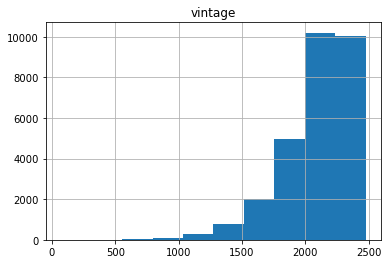

In [6]:
population.hist(bins=10)

* The distribution of vintage is Left(Negative) Skewed

In [9]:
population['vintage'].mean()

2091.1441054189277

* The mean value of vintage feature is around 2091

In [16]:
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean().values[0])

In [17]:
sampled_means

[2071.71,
 2086.08,
 2130.73,
 2111.11,
 2108.27,
 2096.4,
 2090.15,
 2132.39,
 2104.65,
 2101.49,
 2086.37,
 2043.65,
 2082.75,
 2108.0,
 2072.94,
 2065.97,
 2117.4,
 2108.97,
 2089.51,
 2101.75,
 2063.87,
 2096.99,
 2078.14,
 2113.69,
 2110.89,
 2063.76,
 2074.84,
 2096.56,
 2118.71,
 2064.74,
 2079.44,
 2079.44,
 2049.04,
 2102.09,
 2084.2,
 2099.51,
 2064.24,
 2103.14,
 2098.05,
 2137.38,
 2128.1,
 2103.61,
 2115.66,
 2102.9,
 2077.11,
 2032.26,
 2090.09,
 2109.75,
 2106.3,
 2060.24,
 2080.83,
 2098.21,
 2074.33,
 2034.29,
 2103.87,
 2162.07,
 2089.93,
 2097.15,
 2080.06,
 2078.42,
 2083.84,
 2087.35,
 2026.94,
 2117.64,
 2088.94,
 2029.05,
 2106.02,
 2077.99,
 2078.7,
 2073.74,
 2053.54,
 2079.13,
 2136.29,
 2042.79,
 2095.16,
 2133.4,
 2056.56,
 2094.74,
 2078.13,
 2092.57,
 2090.83,
 2129.41,
 2050.52,
 2084.72,
 2098.31,
 2032.57,
 2080.4,
 2093.75,
 2097.21,
 2105.08,
 2086.36,
 2121.74,
 2089.55,
 2072.68,
 2161.9,
 2109.28,
 2078.8,
 2095.55,
 2086.95,
 2082.06,
 2089.15,
 2

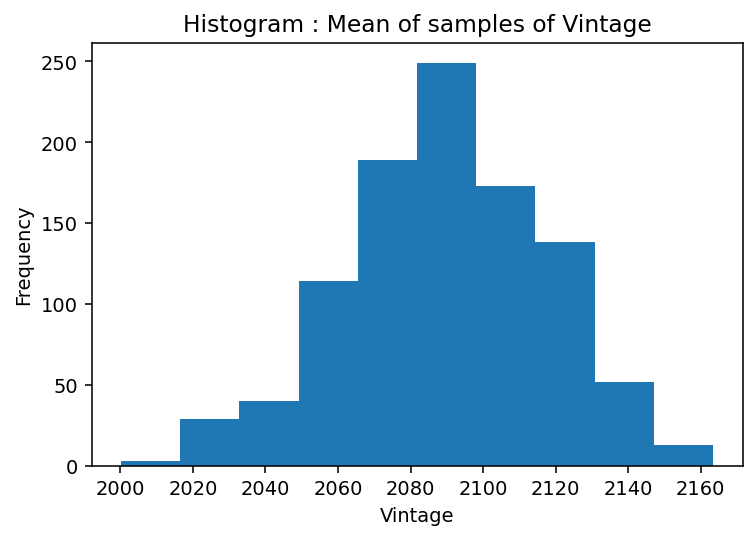

In [18]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(sampled_means)
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("Histogram : Mean of samples of Vintage")
plt.show()

In [20]:
* 100 Samples of 100 datapoints were taken 
* Mean of the random samples actully follow the Normal Distribution
* Central Limit Theorem  can be verified by using KDE as well 

In [21]:
# View the mean of the sampled_means
pd.Series(sampled_means).mean()

2089.875959999999

In [22]:
# Subtract Mean Sample Mean From True Population Mean
error = population['vintage'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only 1.268145 different the True Population mean!
